**1. Install OpenCV**
###### Installs OpenCV, a library for image processing and computer vision tasks.

In [ ]:
!pip install opencv-python

**2. Import Required Libraries**


* cv2: OpenCV for image processing.
* numpy: For numerical operations.
* matplotlib.pyplot: For displaying images.



In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**3. Load the YOLO Model**
* Loads the pre-trained YOLOv3-tiny model.
* weights contains the trained model weights.
* cfg contains the model architecture.

In [ ]:
yolo = cv2.dnn.readNet("/content/drive/MyDrive/Project/YOLO_Object_Detection(OpenCV) /yolov3-tiny.weights", "/content/drive/MyDrive/Project/YOLO_Object_Detection(OpenCV) /yolov3-tiny.cfg")

**4. Load COCO Class Labels**
* Reads class names like "person", "car", "dog", etc., used in YOLO detection.

In [ ]:
classes = []

with open ("/content/drive/MyDrive/Project/YOLO_Object_Detection(OpenCV) /coco.names", 'r') as f:
   classes = f.read().splitlines()

In [ ]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [ ]:
len(classes)

80

**5. Load an Image**

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Project/YOLO_Object_Detection(OpenCV) /Image/Image1.jpeg")

**6. Prepare the Image for YOLO (Blob)**

* Converts image to a blob (4D array) for YOLO input.
* Resizes to 320x320, scales pixel values to [0,1], and changes BGR to RGB.



In [ ]:
blob = cv2.dnn.blobFromImage(img, 1/255, (320,320), (0,0,0), swapRB = True, crop = False)

In [ ]:
blob.shape

(1, 3, 320, 320)

**7. Display the Blob Image**

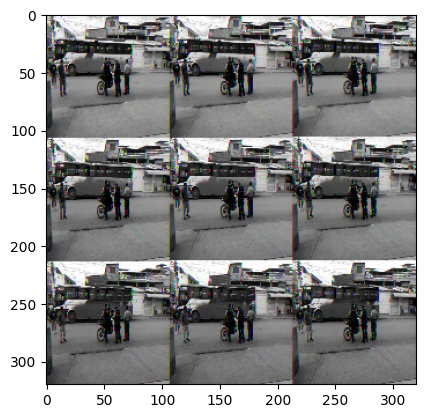

In [ ]:
# To print image
i = blob[0].reshape(320,320,3)
plt.imshow(i)

**8. Run the Image Through YOLO**

* Passes the blob to YOLO.
* Gets the names of output layers.
* forward() runs inference and returns detections.

In [ ]:
yolo.setInput(blob)

In [ ]:
output_layes_name = yolo.getUnconnectedOutLayersNames()

layeroutput = yolo.forward(output_layes_name)

**9. Process YOLO Outputs & Filter Detections Based on Confidence**

* Loops over each detection.
* detection[5:] gives class probabilities.
* Gets highest confidence score and class ID.
* If confidence > 0.7, calculates bounding box.
* center_x, center_y, w, h are YOLO outputs scaled to original image.
* Appends data to respective lists.

In [ ]:
boxes = []
confidences = []  # ← this is the list
class_ids = []

height, width = img.shape[:2]

for output in layeroutput:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]  # ← this is a float

        if confidence > 0.7:
            center_x = int(detection[0] * width)
            center_y = int(detection[0] * height)
            w = int(detection[0] * width)
            h = int(detection[0] * height)

            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))  # ← append to the list
            class_ids.append(class_id)


In [ ]:
len(boxes)

4

**11. Apply Non-Maximum Suppression (NMS)**

* Removes overlapping boxes.
* Keeps only the most confident ones.

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [ ]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0.255, size = (len(boxes),3))

**12. Draw Final Bounding Boxes**

* Loops over final selected boxes.
* Draws rectangle and label with confidence.

In [ ]:
for i in indexes.flatten():
  x,y,w,h = boxes[i]

  label = str(classes[class_ids[i]])
  confi = str(round(confidences[i], 2))
  color = colors[i]


  cv2.rectangle(img, (x,y), (x+w, y+h), color, 1)
  cv2.putText(img, label +" "+confi, (x,y+20), font, 2, (255,255,255), 1)

**13. Show and Save Final Image**

* Shows image with bounding boxes using Matplotlib.
* Saves the result to your Drive.

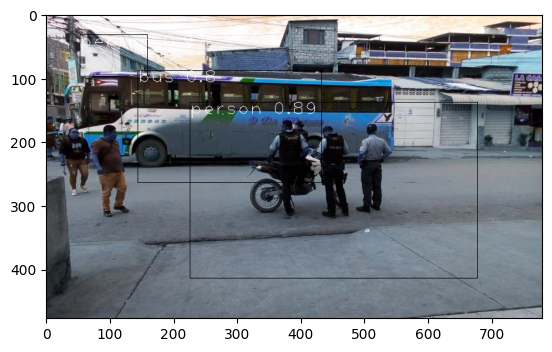

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imwrite("/content/drive/MyDrive/Project/YOLO_Object_Detection(OpenCV) /Image/img.jpg", img)

True